In [145]:
import pandas as pd
import matplotlib
%matplotlib inline

In [146]:
df = pd.read_csv("/Users/thorjakobsen/GIT/JasminFuzzer/evaluation/data/results_0_100.csv")

# General about generated programs

In the following the def. of a safe program is a program that is compilled without errors and which has no errors or safety violation.

In [147]:
print("Amount of programs: ", df.shape[0])
print("Amount of safe programs: ", df.loc[(df.Errors == "[[], []]") & df.Safe == True].shape[0])

Amount of programs:  100
Amount of safe programs:  72


## Program generation time and safety check time

Fastest time:  0.0006039142608642577
Sloweset time:  0.0264890193939209
Average time:  0.0026285696029663087


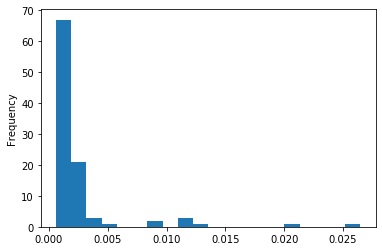

In [148]:
print("Fastest time: ", df.GenerationTime.min())
print("Sloweset time: ", df.GenerationTime.max())
print("Average time: ", df.GenerationTime.mean())
df.GenerationTime.plot.hist(bins=20)

Fastest time:  0.01925206184387207
Sloweset time:  1.958332061767578
Average time:  0.05425496578216553


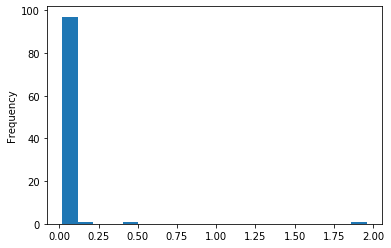

In [149]:
print("Fastest time: ", df.SafetyCheckTime.min())
print("Sloweset time: ", df.SafetyCheckTime.max())
print("Average time: ", df.SafetyCheckTime.mean())
df.SafetyCheckTime.plot.hist(bins=20)

## Program sizes

Smallets size of program:  99
Largest size of program:  1851
Average size of program:  700.0


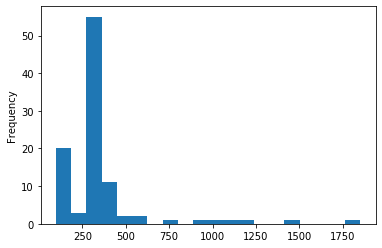

In [150]:
print("Smallets size of program: ", df.Size.min())
print("Largest size of program: ", df.Size.max())
print("Average size of program: ", df.size.mean())
df.Size.plot.hist(bins=20)

In [165]:
df_errors = df.Errors.values

compiler_error_codes = []
safety_error_codes = []

def get_error_codes(i):
    
    safety_check = i.startswith("[[], ['")
    lists = i.split("['")
    final_list = [[],[]]
    
    if i == "[[], []]":
        
        return final_list
    
    for j in range(1, len(lists)):
    
        internal_list = lists[j].split("']")[0]
        error_list = internal_list.split("', '")

        if j == 2 or (j == 1 and safety_check):
            for l in error_list:
                if l in safety_error_codes:
                    final_list[1].append(safety_error_codes.index(l))
                else:
                    safety_error_codes.append(l)
                    final_list[1].append(safety_error_codes.index(l))
        else:
            for l in error_list:   
                if l in compiler_error_codes:
                    final_list[0].append(compiler_error_codes.index(l))
                else:
                    compiler_error_codes.append(l)
                    final_list[0].append(compiler_error_codes.index(l))
                    
    return final_list

for i in range(0, df.shape[0]):

    result = get_error_codes(df_errors[i])
    df.at[i, "Errors"] = result

In [166]:
for i in compiler_error_codes:
    print(i)

compilation error in functions main and main at position line 7 from line 16: assembler error Invalid pexpr for word
PLEASE REPORT
compilation error in functions f0 and f0 at position line 56: linearisation error assign not a word
compilation error in functions f0 and f0 at position line 11: assembler error assemble_x86_opn : invalid instruction (check) CMP_64
Register allocation: no register bank for type bool
compilation error in functions f0 and f0 at position line -1: assembler error Not a (x)register
compilation error in functions f0 and f0 at position line 23: assembler error: invalid condition 
((~ ZF.78) && ZF.78)
compilation error in functions f0 and f0 at position line 7: assembler error Not a (x)register
compilation error in functions main and main at position line 9 from line 16: assembler error Invalid pexpr for word


In [167]:
for i in safety_error_codes:
    print(i)

Fatal error: exception File "src/safety.ml", line 3550, characters 16-22: Assertion failed
Fatal error: exception Failure("Environment.dim_of_var: unknown variable in the environment")


In [168]:
df.Errors

0              [[], []]
1              [[], []]
2              [[], []]
3              [[], []]
4              [[], []]
5              [[], []]
6              [[], []]
7      [[0, 1, 2], [0]]
8         [[3], [1, 2]]
9              [[], []]
10             [[], []]
11             [[], []]
12             [[], []]
13             [[], []]
14             [[], []]
15             [[], []]
16             [[], []]
17             [[], []]
18             [[], []]
19           [[4], [3]]
20        [[4], [3, 2]]
21        [[3], [1, 2]]
22             [[], []]
23             [[], []]
24             [[], []]
25             [[], []]
26             [[], []]
27             [[], []]
28             [[], []]
29             [[], []]
            ...        
70             [[], []]
71             [[], []]
72             [[], []]
73             [[], []]
74             [[], []]
75             [[], []]
76             [[], []]
77             [[], []]
78    [[10, 11, 2], []]
79             [[], []]
80             [